<a href="https://colab.research.google.com/github/Jobby-John/Hypothroid-predictor/blob/main/Week_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

QUESTION DEFINITION

predict if the symptoms of a patient indicates that the patient has hypothyroid.

METRICS OF SUCCESS

We are diagnosing if the variables provided indicate that the patient is hypothyroidism positive or not. a high accuracy is what we expect , not so accurate model means wrong diagnosing and would give rise to wrong medication which can cost lifes.

CONTEXT column description

status - tells us if the patient is negative or has hypothyroidism

age - how old is the patient

sex - if the patient is male or female

on_thyroxine - True /False

query_on_thyroxine

on_antithyroid_medication - if the patient is on medication

thyroid_surgery - if the patient has had thyroid surgery

query_hypothyroid

query_hyperthyroid

pregnant - if the patient is pregnant,true or false

sick - if the patient is sick,

tumor - if the patient has tumor

lithium

goitre - if the patient has goitre

TSH_measured - if a blood test has been done to measure the hormone

TSH - thyroid stimulating hormone , tells the thyroid to release thyroid hormone to the blood.

T3_measured - if T3 measurement has been done

T3 - triiodothyronine , this is a thyroid hormone produced in the thyroid glands

TT4_measured

TT4 - thyroxine , the principla hormone from the thyroid gland.

T4U_measured - true / false

T4U - thyroid hormone produced in the thyroid glands(thyroxine)/levothyroxine

FTI_measured - if FTI has been measured

FTI - free thyroxine index, it is considered more indicator of thyroid, obtained by nultiplying Total T4 and T3 uptake.

TBG_measured - if TBG has been measured.

TBG - thyroid binding globulin, binds thyroid hormones in circulation

EXPERIMENTAL DESIGN

Recording the Experimental Design;-
Below are the steps that will be conducted in this analysis in order to respond to the research question comprehensively:

Load data and preview preliminary characteristics Data Cleaning (check for and deal with outliers, anomalies and missing data) Exploratory Analysis Implementing the Solution Challenging the Solution Follow Up Questions

In [ ]:
#importing all the necessary libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy as sp

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns; sns.set(font_scale=1.2)

import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading the dataset
data=pd.read_csv('hypothyroid.csv')
data.head(3)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?


In [3]:
#check the shape of the dataframe provide
data.shape

(3163, 26)

In [4]:
data.describe

<bound method NDFrame.describe of            status age sex on_thyroxine  ... FTI_measured  FTI TBG_measured TBG
0     hypothyroid  72   M            f  ...            y   10            n   ?
1     hypothyroid  15   F            t  ...            y   17            n   ?
2     hypothyroid  24   M            f  ...            y    0            n   ?
3     hypothyroid  24   F            f  ...            y    6            n   ?
4     hypothyroid  77   M            f  ...            y   44            n   ?
...           ...  ..  ..          ...  ...          ...  ...          ...  ..
3158     negative  58   F            f  ...            y   95            n   ?
3159     negative  29   F            f  ...            y   98            n   ?
3160     negative  77   M            f  ...            y  104            n   ?
3161     negative  74   F            f  ...            y  137            n   ?
3162     negative  56   F            t  ...            y  143            n   ?

[3163 rows x 26 c

In [5]:
#checking for unique values
data.nunique()

status                         2
age                           93
sex                            3
on_thyroxine                   2
query_on_thyroxine             2
on_antithyroid_medication      2
thyroid_surgery                2
query_hypothyroid              2
query_hyperthyroid             2
pregnant                       2
sick                           2
tumor                          2
lithium                        2
goitre                         2
TSH_measured                   2
TSH                          240
T3_measured                    2
T3                            70
TT4_measured                   2
TT4                          269
T4U_measured                   2
T4U                          159
FTI_measured                   2
FTI                          281
TBG_measured                   2
TBG                           53
dtype: int64

In [6]:
#checking the columns of the dataset we have
data.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

DATA CLEANING

In [7]:
# let us check for null values
data.isnull().sum()
#There are no null values in our dataset

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

In [8]:
#the dataset has columns with '?' on the records, lets check the total number of '?' on the columns
print(data[data == '?'].count())

status                          0
age                           446
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           468
T3_measured                     0
T3                            695
TT4_measured                    0
TT4                           249
T4U_measured                    0
T4U                           248
FTI_measured                    0
FTI                           247
TBG_measured                    0
TBG                          2903
dtype: int64


In [9]:
#dropping the columns TBG and TBG_measured
data.drop(['TBG_measured','TBG'],axis=1,inplace=True)

In [10]:
data= data.replace(['?'],np.nan)

In [11]:
data.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44


In [12]:
#let us drop all the null values in some of the columns
data= data[data['age'].notna()]
data = data[data['sex'].notna()]
data = data[data['TSH'].notna()]
data = data[data['T4U'].notna()]
data = data[data['TT4'].notna()]
data = data[data['FTI'].notna()]
data = data[data['T3'].notna()]

In [13]:
#checking whether there are any null values in our dataset
data.isnull().sum()
#The results show that there are no null values present in our data

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
dtype: int64

In [14]:
#checking for duplicates
data.duplicated().sum()
#There are 54 duplicated rows in our dataset. The next step is to get rid of them

54

In [15]:
#removing the duplicates
data.drop_duplicates(inplace=True)

In [16]:
data.duplicated().sum()

0

In [17]:
#let us convert categorical variables to category
data['status'] = data['status'].astype('category')
data['sex'] = data['sex'].astype('category')
data['on_thyroxine']=data['on_thyroxine'].astype('category')
data['on_antithyroid_medication']=data['on_antithyroid_medication'].astype('category')
data['query_on_thyroxine'] = data['query_on_thyroxine'].astype('category')
data['thyroid_surgery'] = data['thyroid_surgery'].astype('category')
data['query_dataroid'] = data['query_hypothyroid'].astype('category')
data['query_hyperthyroid'] = data['query_hyperthyroid'].astype('category')
data['pregnant'] = data['pregnant'].astype('category')
data['sick'] = data['sick'].astype('category')
data['tumor'] = data['tumor'].astype('category')
data['lithium'] = data['lithium'].astype('category')
data['goitre'] = data['goitre'].astype('category')
data['TSH_measured'] = data['TSH_measured'].astype('category')
data['T3_measured'] = data['T3_measured'].astype('category')
data['TT4_measured'] = data['TT4_measured'].astype('category')
data['T4U_measured'] = data['T4U_measured'].astype('category')
data['FTI_measured'] = data['FTI_measured'].astype('category')
data['query_hypothyroid']=data['query_hypothyroid'].astype('category')

In [18]:
# let's convert numerical variables to numerical datatypes and replace question marks nan
##‘coerce’ converts invalid parsing in this case '?' to NaN.

data['age'] = pd.to_numeric(data['age'], errors = 'coerce') 
data['TSH'] = pd.to_numeric(data['TSH'], errors = 'coerce')
data['T3'] = pd.to_numeric(data['T3'], errors = 'coerce')
data['TT4'] = pd.to_numeric(data['TT4'], errors = 'coerce')
data['T4U'] = pd.to_numeric(data['T4U'], errors = 'coerce')
data['FTI'] = pd.to_numeric(data['FTI'], errors = 'coerce')

print(data.dtypes)

status                       category
age                             int64
sex                          category
on_thyroxine                 category
query_on_thyroxine           category
on_antithyroid_medication    category
thyroid_surgery              category
query_hypothyroid            category
query_hyperthyroid           category
pregnant                     category
sick                         category
tumor                        category
lithium                      category
goitre                       category
TSH_measured                 category
TSH                           float64
T3_measured                  category
T3                            float64
TT4_measured                 category
TT4                           float64
T4U_measured                 category
T4U                           float64
FTI_measured                 category
FTI                           float64
query_dataroid               category
dtype: object


In [19]:
#The next step will be to, to encode our column values from string to numerical
data['status']=data['status'].cat.codes
data['sex'] = data['sex'].cat.codes
data['on_thyroxine'] = data['on_thyroxine'].cat.codes
data['query_on_thyroxine'] = data['query_on_thyroxine'].cat.codes
data['on_antithyroid_medication'] = data['on_antithyroid_medication'].cat.codes
data['thyroid_surgery'] = data['thyroid_surgery'].cat.codes
data['query_hyperthyroid'] = data['query_hyperthyroid'].cat.codes
data['pregnant'] = data['pregnant'].cat.codes
data['sick'] = data['sick'].cat.codes
data['tumor'] = data['tumor'].cat.codes
data['lithium'] = data['lithium'].cat.codes
data['goitre'] = data['goitre'].cat.codes
data['TSH_measured'] = data['TSH_measured'].cat.codes
data['T3_measured'] = data['T3_measured'].cat.codes
data['TT4_measured'] = data['TT4_measured'].cat.codes
data['T4U_measured'] = data['T4U_measured'].cat.codes
data['FTI_measured'] = data['FTI_measured'].cat.codes
data['query_hypothyroid']=data['query_hypothyroid'].cat.codes
data['query_dataroid']=data['query_dataroid'].cat.codes


In [20]:
data.head(5)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,query_dataroid
0,0,72,1,0,0,0,0,0,0,0,0,0,0,0,0,30.0,0,0.6,0,15.0,0,1.48,0,10.0,0
1,0,15,0,1,0,0,0,0,0,0,0,0,0,0,0,145.0,0,1.7,0,19.0,0,1.13,0,17.0,0
2,0,24,1,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0.2,0,4.0,0,1.00,0,0.0,0
3,0,24,0,0,0,0,0,0,0,0,0,0,0,0,0,430.0,0,0.4,0,6.0,0,1.04,0,6.0,0
4,0,77,1,0,0,0,0,0,0,0,0,0,0,0,0,7.3,0,1.2,0,57.0,0,1.28,0,44.0,0


In [21]:
#our data is clean now and we can go ahead and carry the analysis part however to avoid 
#having a misleading dataset we might be required to carry out a sampling analysis to ensure that our dataset consist
#of 50% people with cases of hypothyroid and 50% people who are negative

DATA CLEANING

UNIVARIATE ANALYSIS

In [22]:
#we will start by the statistical summary of the data
data.describe()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,query_dataroid
count,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.0,1946.000000,1946.0,1946.000000,1946.0,1946.000000,1946.0,1946.000000,1946.0,1946.000000,1946.000000
mean,0.941932,53.584789,0.321686,0.127441,0.010791,0.013875,0.036485,0.075540,0.071429,0.024666,0.041110,0.012847,0.001028,0.026208,0.0,5.957256,0.0,1.918911,0.0,107.246300,0.0,0.987744,0.0,110.140956,0.075540
std,0.233932,19.258577,0.467243,0.333552,0.103346,0.117001,0.187542,0.264328,0.257606,0.155145,0.198596,0.112643,0.032050,0.159793,0.0,24.676600,0.0,0.955347,0.0,44.081825,0.0,0.230405,0.0,40.324629,0.264328
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.050000,0.0,2.000000,0.0,0.000000,0.0,0.000000,0.000000
25%,1.000000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,1.300000,0.0,82.000000,0.0,0.852500,0.0,90.000000,0.000000
50%,1.000000,57.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.700000,0.0,1.800000,0.0,103.000000,0.0,0.960000,0.0,107.000000,0.000000
75%,1.000000,70.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,2.200000,0.0,2.300000,0.0,125.000000,0.0,1.070000,0.0,126.000000,0.000000
max,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,530.000000,0.0,9.800000,0.0,450.000000,0.0,2.030000,0.0,450.000000,1.000000


1    1833
0     113
Name: status, dtype: int64


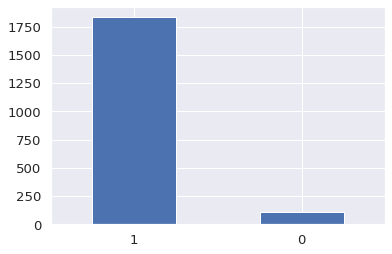

In [23]:
#counting the number of people who have tested negative and those who are hypothyroid.
data.status.value_counts().plot(kind='bar',rot=0)
print(data.status.value_counts())


In [24]:
Crossplots distribution

plt.figure(figsize=(14, 14))
sns.pairplot(data, diag_kind='kde');
plt.show()


Bivariiate analysis
```
# This is formatted as code
```



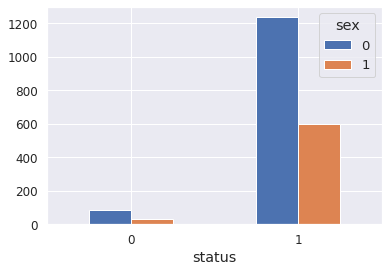

In [25]:
#barchart comparing sex and status
pd.crosstab(data['status'], data['sex']).plot(kind='bar', rot=0, fontsize=12)

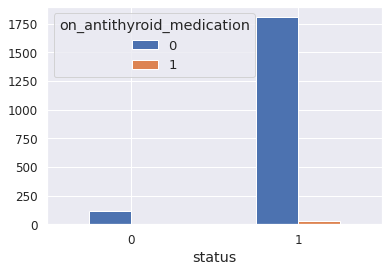

In [26]:
pd.crosstab(data['status'], data['on_antithyroid_medication']).plot(kind='bar', rot=0, fontsize=12)
# a few males who test negative are on antithyroid medication

[Text(0, 0.5, 'Status'),
 Text(0.5, 1.0, 'relation between the age and hypothyroidism')]

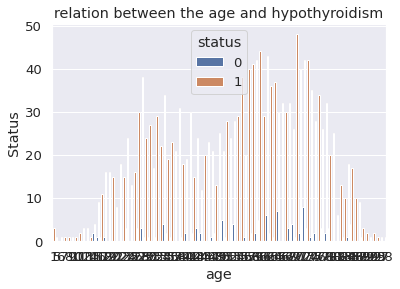

In [27]:
#plot a graph to show the distribution of hypothyroidism across different ages.
age = sns.countplot('age', hue = 'status', data = data)
age.set(title = "relation between the age and hypothyroidism", ylabel = "Status")

Multivariate

In [28]:
collinear=data.corr()
collinear

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,query_dataroid
status,1.000000,-0.024413,0.034575,0.048765,0.025933,0.010667,-0.045437,-0.045432,0.026205,0.025319,0.029276,0.028325,0.007964,-0.000530,NaN,-0.568868,NaN,0.198161,NaN,0.399251,NaN,-0.076930,NaN,0.467834,-0.045432
age,-0.024413,1.000000,-0.003547,-0.030336,-0.009630,-0.068176,-0.025128,0.038989,-0.071848,-0.191360,0.060925,-0.066745,-0.029295,-0.068803,NaN,-0.002758,NaN,-0.340214,NaN,-0.119130,NaN,-0.242962,NaN,0.030210,0.038989
sex,0.034575,-0.003547,1.000000,-0.127926,0.013252,-0.062876,-0.063600,-0.084456,-0.075667,-0.109515,0.023632,-0.019949,-0.022089,-0.085430,NaN,-0.057868,NaN,-0.092994,NaN,-0.173527,NaN,-0.248091,NaN,-0.041347,-0.084456
on_thyroxine,0.048765,-0.030336,-0.127926,1.000000,-0.010086,-0.018983,0.040698,0.129843,-0.070093,0.018706,-0.071369,-0.029914,-0.012258,-0.004818,NaN,-0.006829,NaN,0.045032,NaN,0.220533,NaN,0.076061,NaN,0.183558,0.129843
query_on_thyroxine,0.025933,-0.009630,0.013252,-0.010086,1.000000,-0.012389,0.059256,0.007786,-0.028968,-0.016610,-0.021626,0.076416,-0.003350,0.045132,NaN,-0.022520,NaN,-0.017170,NaN,-0.002051,NaN,-0.042593,NaN,0.031712,0.007786
on_antithyroid_medication,0.010667,-0.068176,-0.062876,-0.018983,-0.012389,1.000000,-0.023082,-0.033907,0.086510,0.009461,-0.024560,-0.013532,-0.003805,-0.019459,NaN,0.001205,NaN,0.085966,NaN,-0.009535,NaN,0.033203,NaN,-0.030600,-0.033907
thyroid_surgery,-0.045437,-0.025128,-0.063600,0.040698,0.059256,-0.023082,1.000000,0.016975,0.020524,-0.013275,-0.040292,-0.022199,-0.006242,-0.014767,NaN,0.010741,NaN,0.001312,NaN,-0.017070,NaN,0.017255,NaN,-0.021892,0.016975
query_hypothyroid,-0.045432,0.038989,-0.084456,0.129843,0.007786,-0.033907,0.016975,1.000000,-0.026427,-0.007847,-0.059188,-0.032610,0.051520,-0.022550,NaN,0.053720,NaN,-0.032128,NaN,0.016582,NaN,0.022047,NaN,-0.013155,1.000000
query_hyperthyroid,0.026205,-0.071848,-0.075667,-0.070093,-0.028968,0.086510,0.020524,-0.026427,1.000000,0.071673,-0.057427,-0.031640,-0.008896,0.041931,NaN,-0.032414,NaN,0.182739,NaN,0.131017,NaN,0.075739,NaN,0.104898,-0.026427
pregnant,0.025319,-0.191360,-0.109515,0.018706,-0.016610,0.009461,-0.013275,-0.007847,0.071673,1.000000,-0.032928,0.011278,-0.005101,0.098344,NaN,-0.014784,NaN,0.246606,NaN,0.202765,NaN,0.395508,NaN,-0.021430,-0.007847


DECISION TREES

In [29]:
#the first step is to get our label and features data
test_features=['sex','on_thyroxine','query_on_thyroxine','on_antithyroid_medication',
               'thyroid_surgery','query_hypothyroid','query_hyperthyroid','pregnant',
               'sick','tumor','lithium','goitre','TSH','T3','TT4','T4U','FTI']
X=data[test_features].values
y=data['status'].values

In [30]:
#let us split the data into train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)

In [31]:
tree=DecisionTreeClassifier()
tree.fit(X_train,y_train)
y_pred=tree.predict(X_test)


In [32]:
comparison=pd.DataFrame({'Actually':y_test.flatten(), 'Predicted':y_pred.flatten()})
print(comparison)
print(comparison.describe())


     Actually  Predicted
0           1          1
1           1          1
2           1          1
3           1          1
4           1          1
..        ...        ...
579         1          1
580         0          0
581         1          1
582         1          1
583         1          1

[584 rows x 2 columns]
         Actually   Predicted
count  584.000000  584.000000
mean     0.931507    0.931507
std      0.252807    0.252807
min      0.000000    0.000000
25%      1.000000    1.000000
50%      1.000000    1.000000
75%      1.000000    1.000000
max      1.000000    1.000000


In [33]:
print('Accuracy score:',accuracy_score(y_test,y_pred))
print('Mean Absolute error', metrics.mean_absolute_error(y_test,y_pred))
print('Mean squared error:', metrics.mean_squared_error(y_test,y_pred))
print('Root mean squared error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('Confusion Matrix:',metrics.confusion_matrix(y_test,y_pred))

Accuracy score: 0.9863013698630136
Mean Absolute error 0.0136986301369863
Mean squared error: 0.0136986301369863
Root mean squared error: 0.11704114719613055
Confusion Matrix: [[ 36   4]
 [  4 540]]


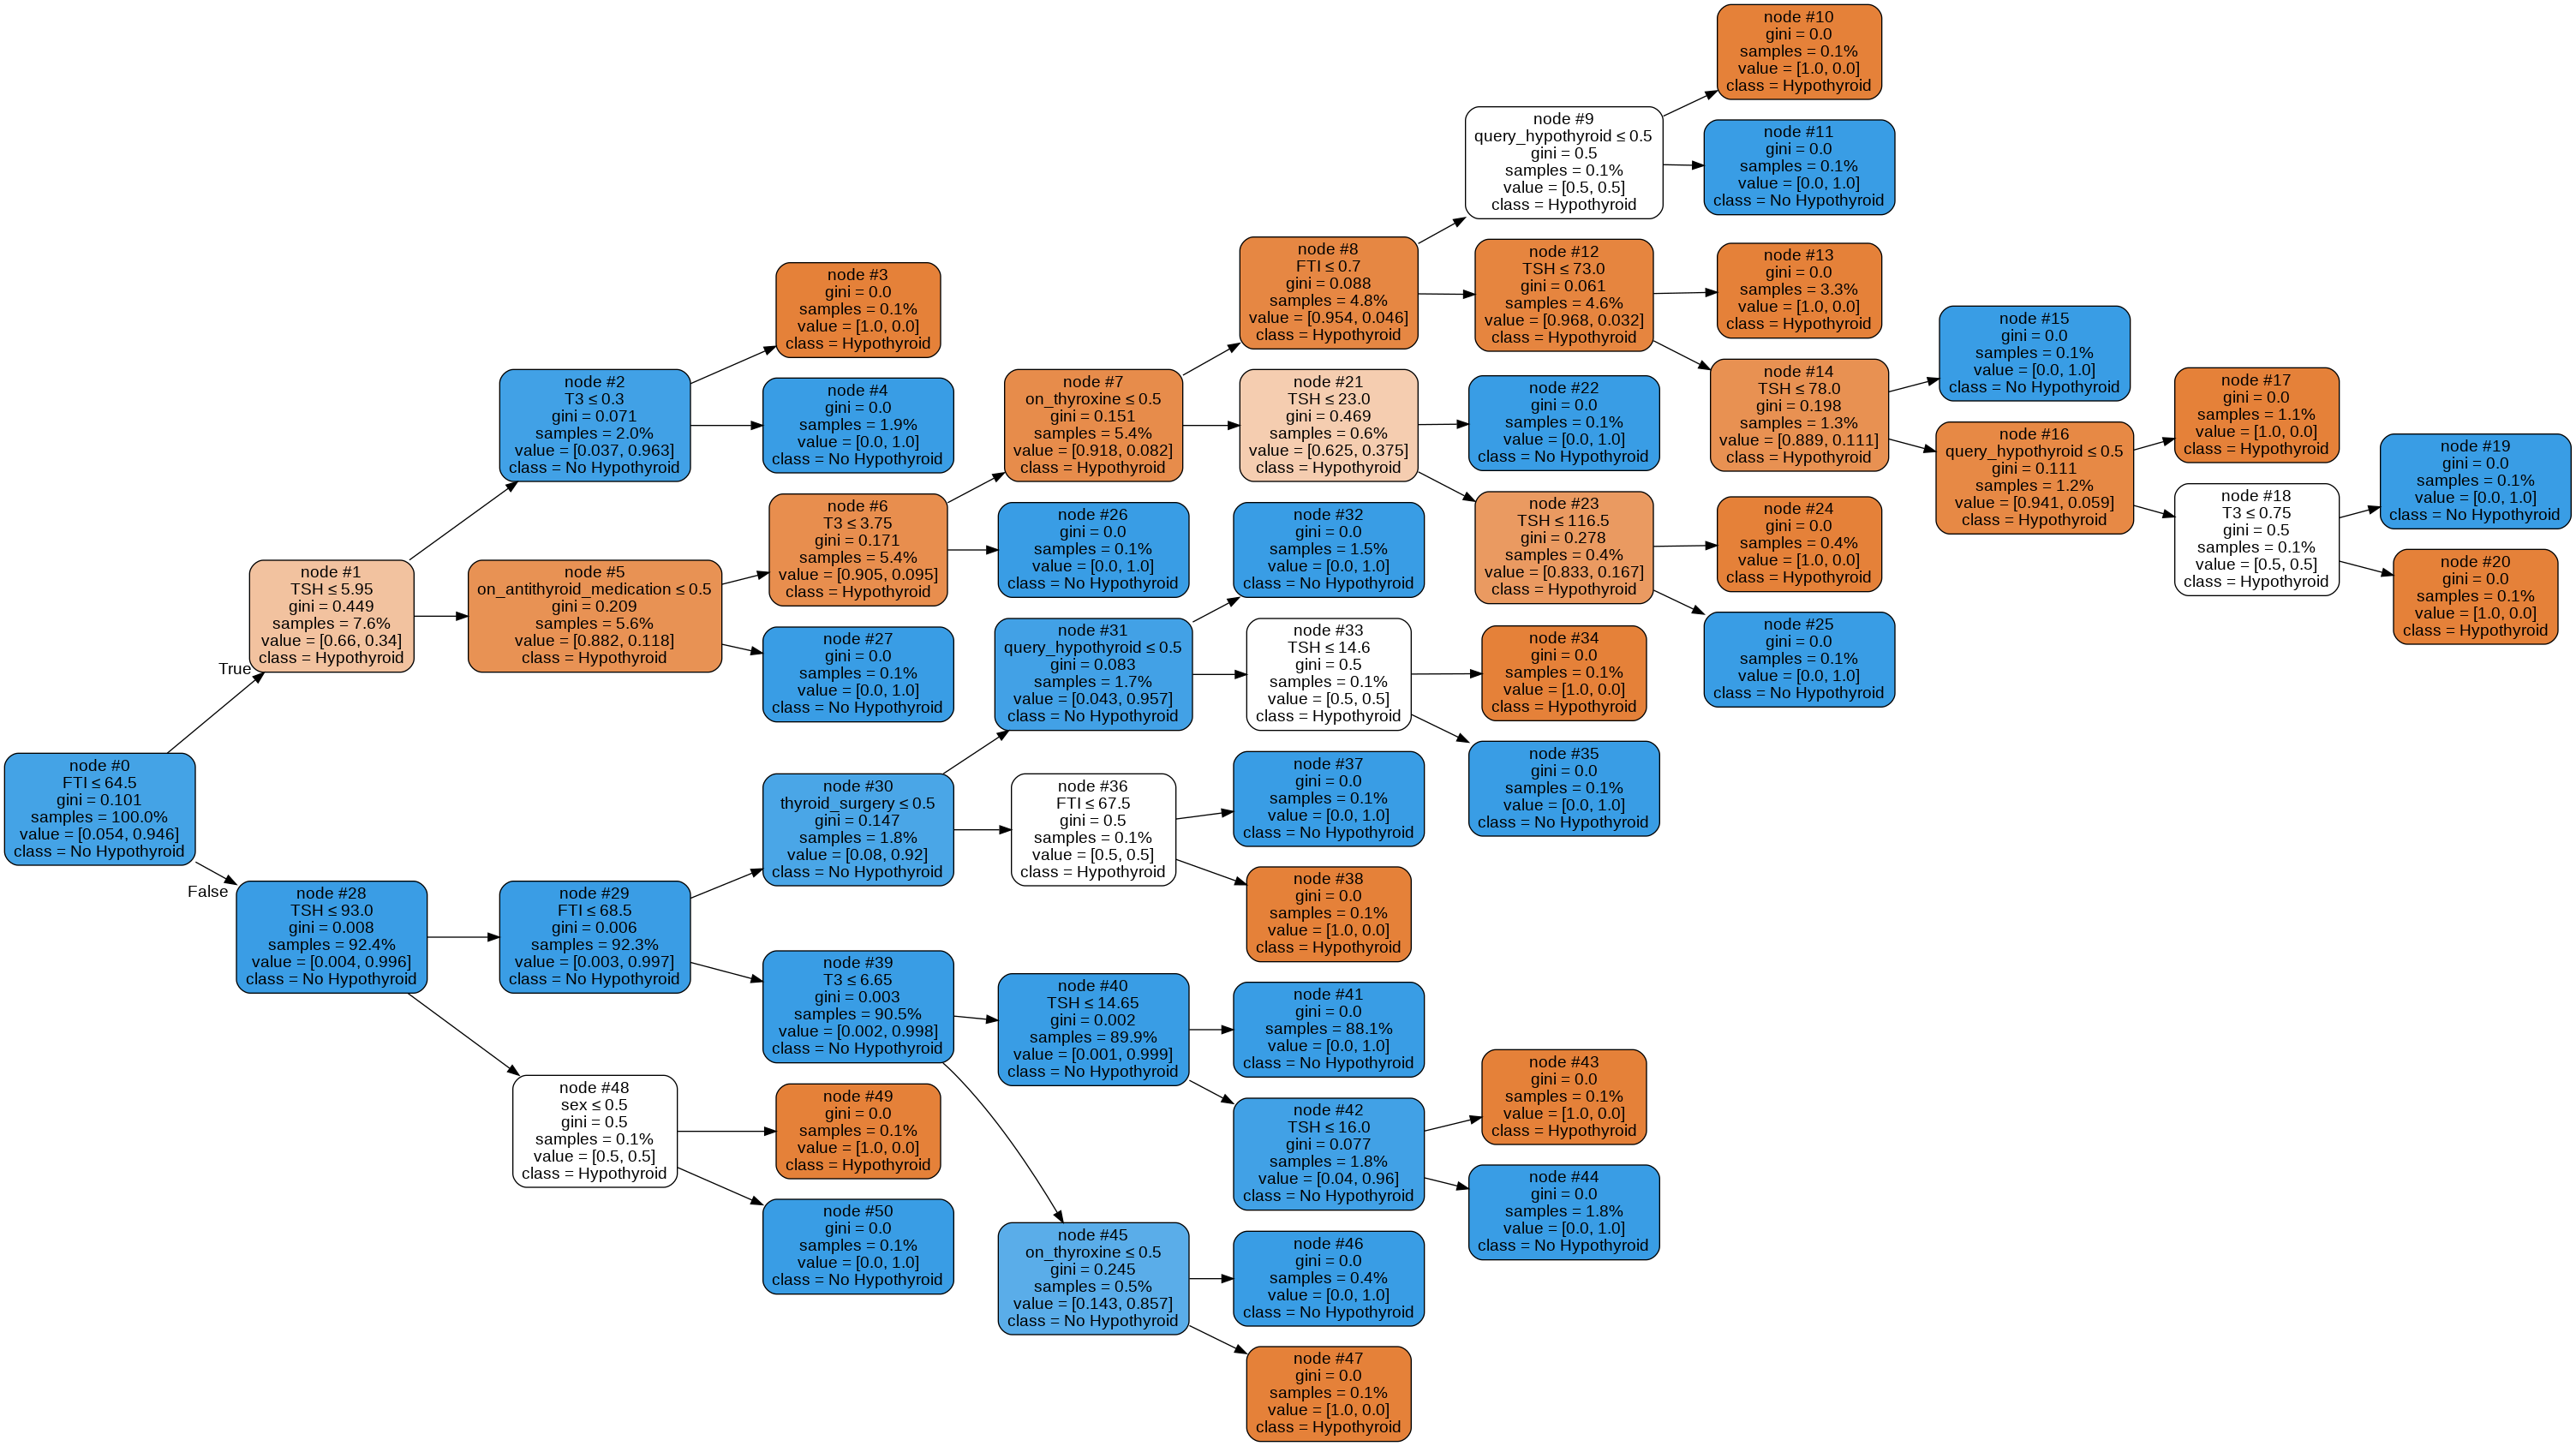

In [34]:
#Visualizing the model at a random tree
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
Iodata=StringIO()
export_graphviz(tree, out_file=Iodata,feature_names=test_features,class_names=['Hypothyroid', 'No Hypothyroid'],
                filled=True,impurity=True, node_ids=True, proportion=True, rotate=True,rounded=True, special_characters=True)
graph=pydotplus.graph_from_dot_data(Iodata.getvalue())
graph.write_png('Hypothroid')
Image(graph.create_png())

In [35]:
#checking the importance variables in our decision tree
# Checking the important features from the model

importances = list(tree.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(test_features, importances)]

# Sorting the values in descending order.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: FTI                  Importance: 0.61
Variable: TSH                  Importance: 0.28
Variable: T3                   Importance: 0.04
Variable: on_thyroxine         Importance: 0.02
Variable: on_antithyroid_medication Importance: 0.02
Variable: query_hypothyroid    Importance: 0.02
Variable: sex                  Importance: 0.01
Variable: thyroid_surgery      Importance: 0.01
Variable: query_on_thyroxine   Importance: 0.0
Variable: query_hyperthyroid   Importance: 0.0
Variable: pregnant             Importance: 0.0
Variable: sick                 Importance: 0.0
Variable: tumor                Importance: 0.0
Variable: lithium              Importance: 0.0
Variable: goitre               Importance: 0.0
Variable: TT4                  Importance: 0.0
Variable: T4U                  Importance: 0.0


ADA BOOST CLASSIFIER

In [36]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import AdaBoostClassifier
ada_boost=AdaBoostClassifier(RandomForestClassifier(max_depth=5),n_estimators=50,random_state=10)
#fitting the model
ada_boost.fit(X_train,y_train)
pred_ada=ada_boost.predict(X_test)

In [37]:
print('Accuracy score:',accuracy_score(y_test,pred_ada))
print('Mean Absolute error', metrics.mean_absolute_error(y_test,pred_ada))
print('Mean squared error:', metrics.mean_squared_error(y_test,pred_ada))
print('Root mean squared error:',np.sqrt(metrics.mean_squared_error(y_test,pred_ada)))
print('Confusion Matrix:',metrics.confusion_matrix(y_test,pred_ada))


Accuracy score: 0.9897260273972602
Mean Absolute error 0.010273972602739725
Mean squared error: 0.010273972602739725
Root mean squared error: 0.1013606067599229
Confusion Matrix: [[ 35   5]
 [  1 543]]


GRADIENT BOOSTING

In [38]:
# lets first create the gradient boosting classifier
from sklearn.ensemble import GradientBoostingRegressor
target_number_of_trees = 200
# train the model
gradient=GradientBoostingClassifier(learning_rate=0.1, n_estimators=100,max_depth=2)
#fitting the model
gradient.fit(X_train,y_train)
grad_pred=gradient.predict(X_test)

In [39]:
print('Accuracy score:',accuracy_score(y_test,grad_pred))
print('Mean Absolute error', metrics.mean_absolute_error(y_test,grad_pred))
print('Mean squared error:', metrics.mean_squared_error(y_test,grad_pred))
print('Root mean squared error:',np.sqrt(metrics.mean_squared_error(y_test,grad_pred)))
print('Confusion Matrix:',metrics.confusion_matrix(y_test,grad_pred))

Accuracy score: 0.988013698630137
Mean Absolute error 0.011986301369863013
Mean squared error: 0.011986301369863013
Root mean squared error: 0.10948196824072452
Confusion Matrix: [[ 35   5]
 [  2 542]]


In [41]:
# comparing actual values to predicted values
grad_compare = pd.DataFrame({'Actual' : y_test.flatten(),
                        'Predicted' : grad_pred.flatten()})

# previewing our summary statistics
grad_compare.describe()

,Actual,Predicted
count,584.000000,584.000000
mean,0.931507,0.936644
std,0.252807,0.243811
min,0.000000,0.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


Support Vector Machines

Before we start working on the support vector machine we must appreciate that through the random forest classifiers we were able to identify the best parameters that are valuable in our dataset. These are FTI                            Importance: 0.61
TSH                  Importance: 0.28
T3                   Importance: 0.05
on_antithyroid_medication Import:0.02

In [42]:
X=data[['FTI','TSH','T3']].values
y=data['status'].values

In [43]:
#let us split our data into train and test datasets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)

In [44]:
linear=SVC(kernel='linear')
linear.fit(X_train,y_train)
linear_pred=linear.predict(X_test)


In [45]:
print('Accuracy score:',accuracy_score(y_test,linear_pred))
print('Mean Absolute error', metrics.mean_absolute_error(y_test,linear_pred))
print('Mean squared error:', metrics.mean_squared_error(y_test,linear_pred))
print('Root mean squared error:',np.sqrt(metrics.mean_squared_error(y_test,linear_pred)))
print('Confusion Matrix:',metrics.confusion_matrix(y_test,linear_pred))

Accuracy score: 0.9811643835616438
Mean Absolute error 0.018835616438356163
Mean squared error: 0.018835616438356163
Root mean squared error: 0.13724291033913616
Confusion Matrix: [[ 30  10]
 [  1 543]]


Polynomial SVC

In [47]:
polyclassifier=SVC(kernel='poly', degree=3, gamma=0.01)
polyclassifier.fit(X_train,y_train)
poly_pred=polyclassifier.predict(X_test)


In [48]:
# making prediction
y_pred_poly = polyclassifier.predict(X_test)

# Model Evaluation

print('Accuracy: ', accuracy_score(y_test, y_pred_poly))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_poly))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_poly))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_poly)))

Accuracy:  0.9845890410958904
Mean Absolute Error: 0.015410958904109588
Mean Squared Error: 0.015410958904109588
Root Mean Squared Error: 0.12414088329035519


RADIAL BASIS CLASSIFICATION

In [49]:
# Building the model 
rbfclassifier = SVC(kernel='rbf')

# Training the model using the training set
rbfclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [50]:
# making prediction
y_pred_rbf = rbfclassifier.predict(X_test)

# Model Evaluation
print('Accuracy: ', accuracy_score(y_test, y_pred_rbf))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_rbf))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_rbf))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rbf)))

Accuracy:  0.9863013698630136
Mean Absolute Error: 0.0136986301369863
Mean Squared Error: 0.0136986301369863
Root Mean Squared Error: 0.11704114719613055


In [51]:
# LETS IMPORT GRIDSEARCH TO USE HERE
from sklearn.model_selection import GridSearchCV
#define C and gamma range

C_range=list(range(1,10))
gamma_range = [0.0001, 0.001, 0.01, 1, 10]

# fit the C and gamma range on parameter grid
parameter_grid = dict(gamma=gamma_range, C=C_range)

#  find the best parameters and best model score
grid = GridSearchCV(SVC(kernel='rbf'), param_grid=parameter_grid, cv=5, n_jobs=-1, scoring='accuracy')

# fit the grid model
grid.fit(X, y)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'gamma': [0.0001, 0.001, 0.01, 1, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [52]:
# fit model with above parameters

rbfclassifier = SVC(kernel='rbf', C = 5, gamma = 0.001)

rbfclassifier.fit(X_train, y_train)

y_pred_rbf2 = rbfclassifier.predict(X_test)

# Model Evaluation

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_rbf2))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_rbf2))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rbf2)))
print('Accuracy Score :', accuracy_score(y_test,y_pred_rbf2))

Mean Absolute Error: 0.017123287671232876
Mean Squared Error: 0.017123287671232876
Root Mean Squared Error: 0.1308559806475534
Accuracy Score : 0.9828767123287672


In [53]:
# now doing it with rbf kernel
rbf = SVC(kernel = 'rbf', gamma = 'auto')

# training the model
rbf.fit(X_train, y_train)

# making prediction
y_pred = rbf.predict(X_test)

In [54]:
print("rbf kernel score:", metrics.accuracy_score(y_test, y_pred))

rbf kernel score: 0.9315068493150684


In [ ]:
#our rbf kernel is 0.9805, this is a good accuracy.the rbf is has an acccuracy similsr to that of polynomial.. our model generally did gOOd.

SIGMOID KERNEL

In [55]:
sig = SVC(kernel = 'sigmoid', gamma = 'auto')

# training the model
sig.fit(X_train, y_train)

# making prediction
sig_y_pred = sig.predict(X_test)

In [56]:
# checking the accuracy of our model
print("Sigmoid kernel score:", metrics.accuracy_score(y_test, sig_y_pred))

Sigmoid kernel score: 0.934931506849315


our sigmoid accuracy score is 92%, this is the lowest compared to the other models above

> Indented block





CHALLENGING SOLUTION

In conclusion, our models did well, our metric of success was met, the accuracy of each model was above 92%.

the model would have done better if the dataset was balanced and there we no missing values as I had to drop some columns

The data contains a small number ofpeople who tested positive for hypothyroidism compared to those who tested negative
